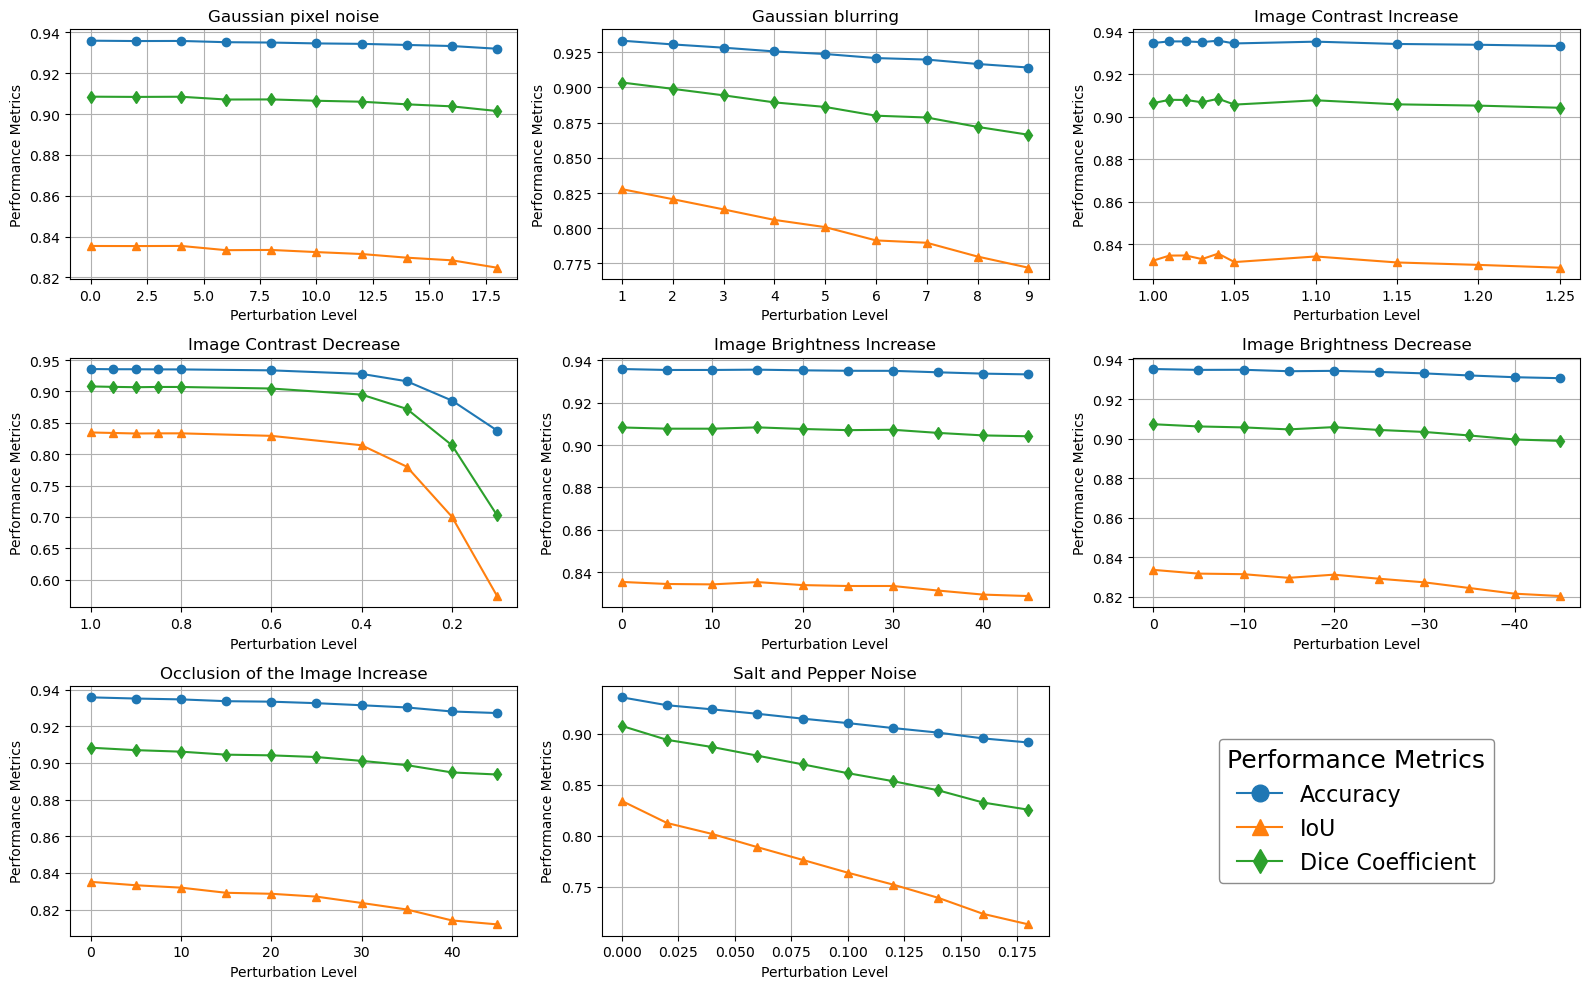

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = [
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Gaussian_pixel_noise/test_metrics.csv",
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Gaussian_Blurring/test_metrics.csv",
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Image_Contrast_Increase/test_metrics.csv",
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Image_Contrast_Decrease/test_metrics.csv",
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Image_Brightness_Increase/test_metrics.csv",
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Image_Brightness_Decrease/test_metrics.csv",
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Image_Occlusion_Increase/test_metrics.csv",
    "/home/noxiusk/Desktop/data_science/cv/CV_Assignment/src/test_results_2/Image_Salt_and_Pepper_Noise/test_metrics.csv"
]

df = [pd.read_csv(file) for file in file_path]
titles = ["Gaussian pixel noise", "Gaussian blurring", "Image Contrast Increase", "Image Contrast Decrease", 
          "Image Brightness Increase", "Image Brightness Decrease", "Occlusion of the Image Increase", "Salt and Pepper Noise"]

fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = axes.flatten()

# Keep track of the first plot's handles and labels for the shared legend
legend_handles = []
legend_labels = []

for i in range(8):
    perturbation_level = df[i]["Perturbation Level"].values
    if i == 5:
        perturbation_level = -perturbation_level
    loss = df[i]["Loss"].values
    accuracy = df[i]["Accuracy"].values
    iou = df[i]["IoU"].values
    dice_coefficient = df[i]["Dice Coefficient"].values
    
    ax = axes[i]
    
    # Plot data
    acc_line, = ax.plot(perturbation_level, accuracy, marker='o', label="Accuracy")
    #loss_line, = ax.plot(perturbation_level, loss, marker='s', label="Loss")
    iou_line, = ax.plot(perturbation_level, iou, marker='^', label="IoU")
    dice_line, = ax.plot(perturbation_level, dice_coefficient, marker='d', label="Dice Coefficient")
    
    # Only store handles and labels from the first plot
    if i == 0:
        legend_handles = [acc_line, iou_line, dice_line]
        legend_labels = ["Accuracy", "IoU", "Dice Coefficient"]
    
    ax.set_xlabel("Perturbation Level")
    ax.set_ylabel("Performance Metrics")
    ax.set_title(titles[i])
    if i == 3 or i == 5:
        ax.invert_xaxis()
    
    # Remove individual legends
    ax.grid(True)

# Use the empty subplot for the legend
legend_ax = axes[8]

# Turn off axis
legend_ax.axis('off')

# Place a bigger legend in the empty subplot
legend_ax.legend(
    legend_handles, 
    legend_labels, 
    loc='center', 
    fontsize=16,  # Increased font size
    markerscale=2.0,  # Makes the markers larger
    frameon=True,  # Adds a frame around the legend
    framealpha=0.9,  # Makes the frame slightly transparent
    edgecolor='gray',  # Frame edge color
    title='Performance Metrics',  # Optional: adds a title to the legend
    title_fontsize=18  # Optional: controls title font size
)

plt.tight_layout()
plt.show()
#save the plot
fig.savefig("performance_metrics.png")